# Predicting Heart Disease

Author: Emily Wang

Course Project, UC Irvine, Math 10, F22

## Introduction

Cardiovascular disease is one of the leading causes of death in the world. So it is important to know what risk factors play a role in determining heart disease, which will lead to helping to find a cure or solution to prevent heart disease. In my project, I am trying to predict whether or not a person has a heart disease based on certain risk factors. In addition, I will be looking at which factors have a greater chance of developing heart disease and which ones have no correlation.

## Main portion of the project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import tree

### Reading Data

In [2]:
df = pd.read_csv("heart_data.csv")
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
df.shape

(918, 12)

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 918 rows and 12 columns in this dataset.


### Cleaning Data

In [5]:
# Checking to see if there are any missing values in the dataset.
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset doesn't have any missing data.

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
# Sorting the dataset columns based on if they are numeric types or not.
num_cols = [cols for cols in df.select_dtypes(include=np.number)]
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [9]:
# creating a list of nonnumerical columns in the data set
categorical_cols = [cols for cols in df.select_dtypes(include="object")]
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
df["HD"] = df["HeartDisease"].map({0:"False", 1:"True"})

To use the HeartDisease column as the output value and y variable for classification in the decision tree, the datatype needs to be changed to object since, in the original data set, the value was an integer datatype.

In [11]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease     HD  
0      172              N      0.0       Up             0  False  
1      156              N      1.0     Flat             1   True  
2       98              N      0.0       Up             0  False  
3      108              Y      1.5     Flat             1   True  
4      122              N      0.0       Up             0  False  
..     ...            ...      ...      ...           ...    ...  
913    132              N      1.2     Flat             1   True  
914    141              N      3.4     Flat             1   True  
915    115              Y      1.2     Flat             1   True  
916    174              N      0.0     Flat             1   True  
917    173              N      0.0       Up             0  False  

[918 rows x 13 columns]

### Data Analysis

In [12]:
df.sample(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
50    50   M           ASY        130          233          0     Normal   
604   68   M           NAP        134          254          1     Normal   
27    52   M           ATA        120          284          0     Normal   
353   58   M           ASY        130            0          0         ST   
122   46   M           ASY        110          240          0         ST   
258   51   F           NAP        150          200          0     Normal   
333   40   M           ASY         95            0          1         ST   
363   56   M           ASY        120            0          0         ST   
71    44   M           ATA        130          215          0     Normal   
507   40   M           NAP        106          240          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease     HD  
50     121              Y      2.0     Flat             1   True  
604    151              Y      0.0       Up             0  False  
27     118              N      0.0       Up             0  False  
353    100              Y      1.0     Flat             1   True  
122    140              N      0.0       Up             0  False  
258    120              N      0.5       Up             0  False  
333    144              N      0.0       Up             1   True  
363    148              N      0.0     Flat             1   True  
71     135              N      0.0       Up             0  False  
507     80              Y      0.0       Up             0  False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  HD              918 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 93.4+ KB


In [14]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In this heart failure prediction dataset, 508/918, or about 55% of the people, had a heart condition. In the dataset's heart condition column, the value 1 means the person has a heart disease, and 0 means no heart disease was detected.

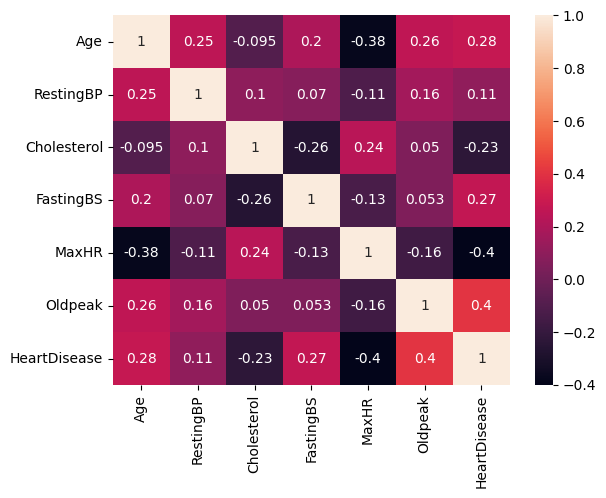

In [15]:
dataplot=sns.heatmap(df.corr(), annot=True)

- Based on the correlation matrix, there isn't a strong correlation between the different cardiovascular risk factors and the target values. 
- The risk factor Oldpeak (numeric value for depression measure) has the highest positive correlation with heart disease, which means that if depression measure increases, then heart disease likelihood also increases and vice versa for the opposite direction.
- Risk factor MaxHR (Maximum Heart Rate) has the highest negative correlation with HeartDisease, which means that as one variable increases, the other variable decreases. So if MaxHR increases, the likelihood of heart disease decreases.  
- There is a surprising finding in this data: the correlation between cholesterol and heart disease is negative. 

### Train_Test_split

In [16]:
num_cols.remove("HeartDisease")

In [17]:
X = df[num_cols]
y = df["HD"]

In [18]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

In [19]:
scaler = StandardScaler()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 1)

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(734, 6)

In [23]:
y_train.shape

(734,)

### Decision Tree Classifier

In [24]:
X1 = df[num_cols]
y1 = df["HD"]

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size = 0.8, random_state = 1)

In [26]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, max_depth=10, random_state=1)

In [27]:
clf.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, random_state=1)

In [28]:
clf.predict(X1_test)

array(['True', 'True', 'True', 'True', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'True', 'True', 'True',
       'False', 'True', 'False', 'True', 'True', 'False', 'False', 'True',
       'False', 'True', 'True', 'False', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'True', 'True', 'True', 'True',
       'False', 'False', 'True', 'False', 'True', 'False', 'False',
       'False', 'True', 'True', 'False', 'True', 'False', 'True', 'True',
       'False', 'True', 'False', 'True', 'False', 'True', 'False', 'True',
       'True', 'True', 'True', 'False', 'True', 'True', 'True', 'False',
       'True', 'True', 'False', 'True', 'True', 'True', 'False', 'False',
       'False', 'True', 'False', 'False', 'True', 'True', 'False',
       'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True',
       'False', 'True', 'True', 'True', 'True', 'True', 'True', 'False',
       'True', 'False', 'True', 'True', 'True', 'False', 'False'

In [29]:
clf.score(X1_train, y1_train)

0.8010899182561307

In [30]:
clf.score(X1_test, y1_test)

0.8152173913043478

Based on the decision tree classification finding, the training and test score were close to each other, so the model could have a high probability of having the correct prediction. Furthermore, we dodn't have to worry about overfitting since the training score was lower than the test score.

In [31]:
(y1_train == clf.predict(X1_train)).value_counts()

True     588
False    146
Name: HD, dtype: int64

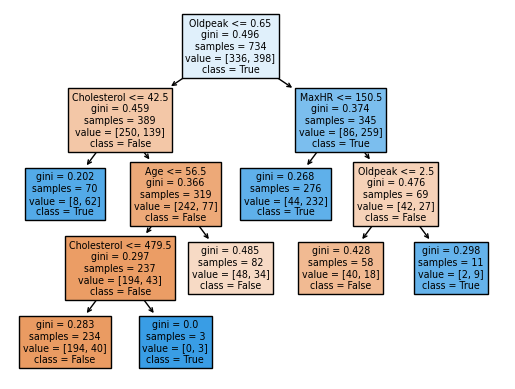

In [32]:
fig = plt.figure()
_ = plot_tree(clf,
                   feature_names = clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

In [33]:
clf.feature_names_in_

array(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'],
      dtype=object)

In [34]:
pd.Series(clf.feature_importances_)

0    0.046660
1    0.000000
2    0.364315
3    0.000000
4    0.156920
5    0.432105
dtype: float64

In [35]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values()

RestingBP      0.000000
FastingBS      0.000000
Age            0.046660
MaxHR          0.156920
Cholesterol    0.364315
Oldpeak        0.432105
dtype: float64

The factors that will most significantly impact the decision tree in the findings of features importance are the higher value numbers. For example, the most relevant factors to predict whether a person has a heart disease or not are Oldpeak and MaxHR.

### Random Forest Classifier

In [36]:
X2 = df[num_cols]
y2 = df["HD"]

In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,  train_size = 0.8, random_state = 1)

In [38]:
rfc = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = 10, random_state=1)

In [39]:
rfc.fit(X2_train, y2_train)

RandomForestClassifier(max_leaf_nodes=10, n_estimators=1000, random_state=1)

In [40]:
rfc.score(X2_train, y2_train)

0.8160762942779292

In [41]:
rfc.score(X2_test, y2_test)

0.8369565217391305

The scores for random forest are about the same as the decision tree. In the random forest classification, the test and training set scores are relatively close together, and there are no signs of overfitting. The score is also somewhat high, showing that this information can accurately predict heart disease. 

### K- Nearest Neighbors Classifier

In [42]:
X3 = df[num_cols]
y3 = df["HD"]

In [43]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,  train_size = 0.8, random_state = 1)

In [44]:
clf2 = KNeighborsClassifier(n_neighbors=10)

In [45]:
clf2.fit(X3_train, y3_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
clf2.predict(X3_test)

array(['False', 'True', 'True', 'True', 'True', 'True', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'True', 'True', 'True', 'True', 'False', 'False', 'True',
       'False', 'False', 'True', 'False', 'True', 'False', 'False',
       'False', 'True', 'True', 'False', 'True', 'True', 'False', 'True',
       'False', 'False', 'True', 'True', 'True', 'False', 'False',
       'False', 'True', 'True', 'False', 'True', 'True', 'True', 'True',
       'False', 'True', 'False', 'False', 'False', 'True', 'False',
       'True', 'False', 'True', 'True', 'True', 'True', 'False', 'False',
       'False', 'True', 'True', 'False', 'True', 'True', 'True', 'True',
       'False', 'True', 'True', 'False', 'False', 'True', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'False', 'True', 'False', 'True', 'False', 'True',
       'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False',
  

In [47]:
clf2.score(X3_test, y3_test)

0.6847826086956522

In [48]:
clf2.score(X3_train, y3_train)

0.7438692098092643

The scores for this classifier have a more significant difference than the other scores for the training and test set and are about 6% apart from each other, so it could be a sign of overfitting since the training set score is higher than the test set score. But the scores are also much lower than the others, so this classifier is probably not the best one to use. 

In [49]:
df["Prediction"] = clf2.predict(X3)
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease     HD Prediction  
0      172              N      0.0       Up             0  False      False  
1      156              N      1.0     Flat             1   True      False  
2       98              N      0.0       Up             0  False       True  
3      108              Y      1.5     Flat             1   True       True  
4      122              N      0.0       Up             0  False      False  
..     ...            ...      ...      ...           ...    ...        ...  
913    132              N      1.2     Flat             1   True      False  
914    141              N      3.4     Flat             1   True       True  
915    115              Y      1.2     Flat             1   True       True  
916    174              N      0.0     Flat             1   True      False  
917    173              N      0.0       Up             0  False      False  

[918 rows x 14 columns]

In [50]:
c1 = alt.Chart(df).mark_circle().encode(
    x="Age",
    y="MaxHR",
    color="HD:N"
)
c2 = alt.Chart(df).mark_circle().encode(
    x="Age",
    y="MaxHR",
    color="Prediction:N"
)

In [51]:
c3 = alt.Chart(df).mark_circle().encode(
    x="Age",
    y="Oldpeak",
    color="HD:N"
)
c4 = alt.Chart(df).mark_circle().encode(
    x="Age",
    y="Oldpeak",
    color="Prediction:N"
)

In [52]:
c1 | c2

alt.HConcatChart(...)

In [53]:
c3 | c4

alt.HConcatChart(...)

By looking at the graphs, the heart disease predictor had more points for false for heart disease than the actual data did. This is the same for both sets of graphs looking at the highest factors in correlation to heart disease.

## Summary

My project aimed to predict the possibility of a person having a heart condition based on some common risk factors. I used several different classifiers to show the probability of predicting a heart disease with the given data. The classifiers with better scores for the training and test set were the decision tree and random forest classifier, with both having about the same score. Even though the models had a pretty high accuracy score of around 80%, the correlations were not high enough to determine if a person has heart disease based on the factors alone. The highest correlation between heart disease and one of the data set risk factors, Oldpeak, was about 40% which needs to be higher to determine if it correlated to someone having a heart disease. Even though the accuracy was relatively high, there were some false negatives which would have a bad outcome since people will think they don't have heart disease when they do.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

* List any other references that you found helpful.

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73a12137-6205-47f9-bda5-430423e844bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>